In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tools import *

In [2]:
PATH_TO_RESULTS = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/'
PATH_TO_PLOTS = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/plots/'

In [3]:
waveform = 'IMRPhenomXPHM'

In [4]:
estimator = 'median'
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)
with open(PATH_TO_RESULTS + 'info/' + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [5]:
num_detectors = {}
for event in events:
    num_detectors[event] = len(detectors[event])

In [6]:
params = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']

In [7]:
cl90_lvk = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_lvk.hdf5')
cl90_fisher = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_fisher_%s.hdf5' %estimator)
cl90_fisher_plus_priors = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_fisher_plus_priors_%s.hdf5' %estimator)

In [8]:
range_summary = {}
for event in events:
    range_summary[event] = {}
    for param in params:
        range_summary[event][param] = [(cl90_fisher[event][param][1] - cl90_fisher[event][param][0])/(cl90_lvk[event][param][1] - cl90_lvk[event][param][0]),
                                       (cl90_fisher_plus_priors[event][param][1] - cl90_fisher_plus_priors[event][param][0])/(cl90_lvk[event][param][1] - cl90_lvk[event][param][0])]

In [9]:
range_summary = pd.DataFrame(range_summary)

In [10]:
range_summary[event][param][0]

5.070051050943914

In [11]:
fisher_ratio = {key: [] for key in params}
fisher_plus_priors_ratio = {key: [] for key in params}
for param in params:
    for event in events:
        fisher_ratio[param].append(range_summary[event][param][0])
        fisher_plus_priors_ratio[param].append(range_summary[event][param][1])

In [12]:
fisher_ratio = pd.DataFrame(fisher_ratio)
fisher_plus_priors_ratio = pd.DataFrame(fisher_plus_priors_ratio)

In [13]:
lbs_errs = ['snr', 'chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
        'psi', 'phase', 'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'redshift', 
        'mass1_lvk', 'mass2_lvk', 'err_chirp_mass', 'err_mass_ratio', 'err_luminosity_distance', 'err_dec', 'err_ra',
        'err_theta_jn', 'err_psi', 'err_phase', 'err_geocent_time', 'err_a_1', 'err_a_2', 'err_tilt_1',
        'err_tilt_2', 'err_phi_12', 'err_phi_jl', 'err_sky_location']

In [14]:
total_mass_median = []
snr_medians = []
active_detectros = []
for event in events:
    label_err = get_label(detectors, event, estimator, 'errors')
    data = pd.read_csv(PATH_TO_RESULTS + 'results/gwfish_mChirp_q/' + label_err, names = lbs_errs, delimiter=' ', skiprows=1)
    total_mass_median.append(data['mass_1'].iloc[0] + data['mass_2'].iloc[0])
    snr_medians.append(data['snr'].iloc[0])
    active_detectros.append(num_detectors[event])

In [15]:
my_palette1 = [(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]
my_palette2 = [(0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0)]

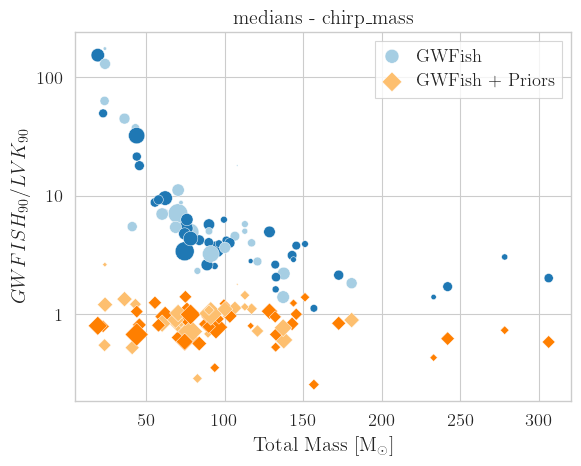

In [16]:
select_param = 'chirp_mass'

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})


ax = sns.scatterplot(x = total_mass_median, y = fisher_ratio[select_param].to_numpy(), hue = active_detectros, 
                    sizes=(1, 200), palette=sns.color_palette(my_palette1), size=snr_medians, label = 'GWFish', legend = False)
ax = sns.scatterplot(x = total_mass_median, y = fisher_plus_priors_ratio[select_param].to_numpy(), hue = active_detectros, 
                    sizes=(1, 200), palette=sns.color_palette(my_palette2), size=snr_medians, marker='D', label = 'GWFish + Priors', legend = False)
#norm = plt.Normalize(min(active_detectros), max(active_detectros))
#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm, format='%1i')
#sm.set_array([])
#ax.get_legend().remove()
#ax.figure.colorbar(sm)

plt.legend()
plt.xlabel('Total Mass [M$_{\odot}$]')
plt.ylabel('$GWFISH_{90}/LVK_{90}$')
plt.yscale('log')
plt.title('medians - %s' %select_param)
plt.show()

In [17]:
import matplotlib
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12)

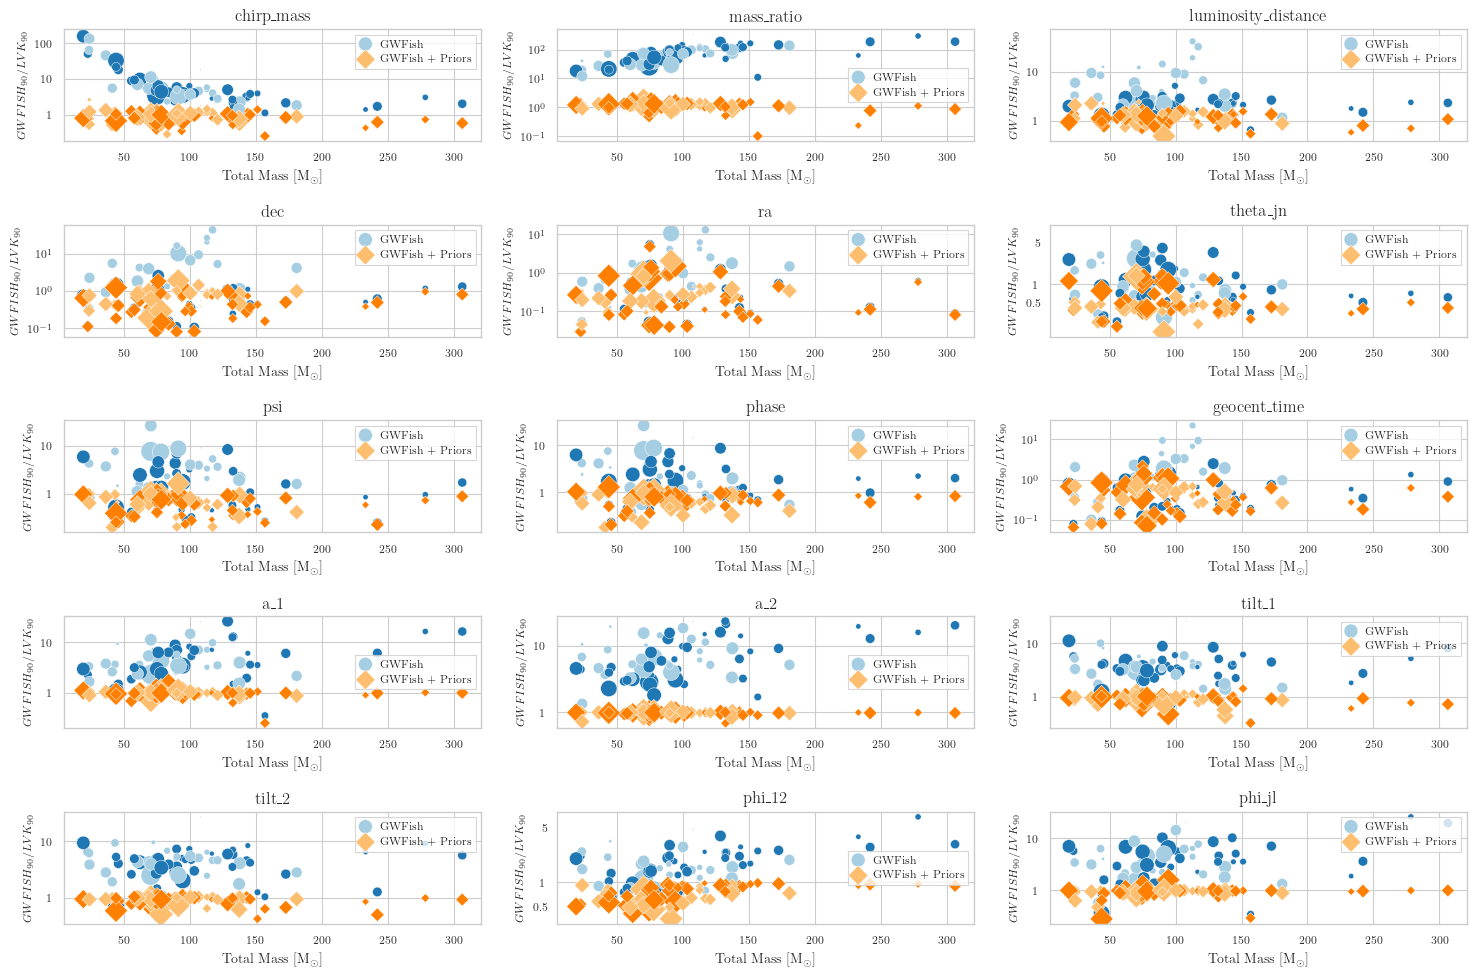

In [18]:
fig, axs = plt.subplots(5, 3, figsize=(15, 10))

for i, param in enumerate(params):
    ax = axs[i//3, i%3]
    ax = sns.scatterplot(x = total_mass_median, y = fisher_ratio[param].to_numpy(), hue = active_detectros, 
                    sizes=(1, 200), palette=sns.color_palette(my_palette1), size=snr_medians, label = 'GWFish', legend = False, ax = ax)
    ax = sns.scatterplot(x = total_mass_median, y = fisher_plus_priors_ratio[param].to_numpy(), hue = active_detectros, 
                    sizes=(1, 200), palette=sns.color_palette(my_palette2), size=snr_medians, marker='D', label = 'GWFish + Priors', legend = False, ax = ax)
    ax.set_xlabel('Total Mass [M$_{\odot}$]', fontsize=10)
    ax.set_ylabel('$GWFISH_{90}/LVK_{90}$', fontsize=8)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_title('%s' %param, fontsize=12, weight='bold')
    ax.legend(fontsize=8)


plt.tight_layout()
plt.savefig(PATH_TO_PLOTS + 'summary_plot_%s.png' %estimator, dpi=600)